In [1]:
import pandas as pd
import seaborn as sns

#Load a list of 'tips' received by a restaurant

df = sns.load_dataset('tips')

#Quick preview

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Understand the data - show structure of the dataframe
df.info() #prints information about the data (index type, data types, how many non-nulls)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
#Get summary statistics
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
#Check for missing values (checks for the null values and then counts how many there are)
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
#Explore columns
#Value counts for a categorical column
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [6]:
#Average tip amount
df['tip'].mean()

np.float64(2.99827868852459)

In [8]:
#Correlation between tip and total bill
df[['tip', 'total_bill']].corr() 

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [11]:
#common transformations
#Who tiped more than 5 dollars?
df[df['tip'] > 5]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
116,29.93,5.07,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5


In [15]:
#create a new column for tip percentage
df['tip_percentage'] = ((df['tip'] / df['total_bill'])*100).round(2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [21]:
# group by day and get average tip
df.groupby('day')['tip'].mean().round(2)



C:\Users\tb975\AppData\Local\Temp\ipykernel_1176\1662348653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip'].mean().round(2)


day
Thur    2.77
Fri     2.73
Sat     2.99
Sun     3.26
Name: tip, dtype: float64

In [22]:
# group by day and get average tip percentage
df.groupby('day')['tip_percentage'].mean().round(2)

C:\Users\tb975\AppData\Local\Temp\ipykernel_1176\3577496625.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip_percentage'].mean().round(2)


day
Thur    16.13
Fri     16.99
Sat     15.31
Sun     16.69
Name: tip_percentage, dtype: float64

In [25]:
#sort to find the 7 biggest tips

df.sort_values('tip', ascending=False).head(7)




,total_bill,tip,sex,smoker,day,time,size,tip_percentage
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.68
212,48.33,9.00,Male,No,Sat,Dinner,4,18.62
23,39.42,7.58,Male,No,Sat,Dinner,4,19.23
59,48.27,6.73,Male,No,Sat,Dinner,4,13.94
141,34.30,6.70,Male,No,Thur,Lunch,6,19.53
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.05
214,28.17,6.50,Female,Yes,Sat,Dinner,3,23.07


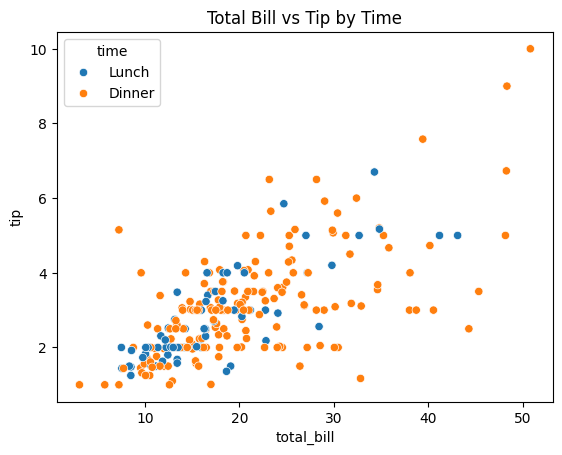

In [26]:
import matplotlib.pyplot as plt

#Scatterplot total bill vs tip coloured by time SEABORN
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')
plt.title('Total Bill vs Tip by Time')
plt.show()

In [ ]:
#Tasks to complete

#1. How would you find the average tip per smoker/non-smoker
#2. How do you display only rows where the tip was greater than 15%
#3. How many lunch vs dinner transations are in the dataset?


#1. How would you find the average tip per smoker/non-smoker
#I added in an extra column of total_bill from a question that GPT asked me

df.groupby(by='smoker')[['tip', 'total_bill']].mean().reset_index()

C:\Users\tb975\AppData\Local\Temp\ipykernel_1176\3030560261.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='smoker')[['tip', 'total_bill']].mean().reset_index()


,smoker,tip,total_bill
0,Yes,3.008710,20.756344
1,No,2.991854,19.188278


In [55]:
#2. How do you display only rows where the tip was greater than 15%
#I want just the rows where tip_percentage is greater than 15

df.query('tip_percentage > 15')
#df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85
...,...,...,...,...,...,...,...,...
231,15.69,3.00,Male,Yes,Sat,Dinner,3,19.12
232,11.61,3.39,Male,No,Sat,Dinner,2,29.20
234,15.53,3.00,Male,Yes,Sat,Dinner,2,19.32
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39


In [64]:
#3. How many lunch vs dinner transations are in the dataset?
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64